# Part 1-A

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import csv
from copy import deepcopy
from pprint import pprint
from IPython.display import HTML, display
import math
%matplotlib inline

In [8]:
data = pd.read_csv(r'C:\Users\sban1\Desktop\GDP Assesment\Data Set\1A\ab40c054-5031-4376-b52e-9813e776f65e.csv')
data.head(15)

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.00,11063.00,143175.00,247144.00,158074.00,42367.00,615606.00,297539.00,...,359433.00,19208.00,724049.00,115523.00,NaN,3979.00,18768.00,343767.00,16818.00,8736039.00
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.00,12547.00,156864.00,282368.00,177511.00,38120.00,724495.00,347032.00,...,401493.00,21663.00,822903.00,131835.00,NaN,4421.00,21609.00,391238.00,18875.00,9946636.00
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.00,14602.00,177745.00,317101.00,206690.00,35921.00,807623.00,400662.00,...,452186.00,25593.00,944146.00,149817.00,NaN,5159.00,24787.00,443783.00,21870.00,11236635.00
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.00,16761.00,198098.00,373920.00,234982.00,40633.00,895027.00,437462.00,...,511178.00,29667.00,1043371.00,161985.00,NaN,5721.00,27844.00,492424.00,24089.00,12433749.00
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.00,18784.00,224234.00,413503.00,260776.00,45002.00,994316.00,485184.00,...,575631.00,NaN,1153795.00,184091.00,NaN,NaN,30304.00,551963.00,26533.00,13675331.00
5,GSDP - CURRENT PRICES (` in Crore),2016-17,699307.00,NaN,NaN,NaN,290140.00,NaN,NaN,547396.00,...,654294.00,NaN,NaN,NaN,NaN,NaN,NaN,622385.00,29557.00,15251028.00
6,(% Growth over previous year),2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,...,11.70,12.78,13.65,14.12,NaN,11.13,15.14,13.81,12.23,13.86
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,12.63,18.14,14.73,13.64,NaN,16.68,14.71,13.43,15.87,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,13.05,15.92,10.51,8.12,NaN,10.89,12.33,10.96,10.14,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,12.61,NaN,10.58,13.65,NaN,NaN,8.84,12.09,10.15,9.99


## Remove the rows: '(% Growth over the previous year)' and 'GSDP - CURRENT PRICES (` in Crore)' for the year 2016-17.

In [9]:
data.drop([5, 10], axis=0, inplace=True)
data.head(10)

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.00,11063.00,143175.00,247144.00,158074.00,42367.00,615606.00,297539.00,...,359433.00,19208.00,724049.00,115523.00,NaN,3979.00,18768.00,343767.00,16818.00,8736039.00
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.00,12547.00,156864.00,282368.00,177511.00,38120.00,724495.00,347032.00,...,401493.00,21663.00,822903.00,131835.00,NaN,4421.00,21609.00,391238.00,18875.00,9946636.00
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.00,14602.00,177745.00,317101.00,206690.00,35921.00,807623.00,400662.00,...,452186.00,25593.00,944146.00,149817.00,NaN,5159.00,24787.00,443783.00,21870.00,11236635.00
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.00,16761.00,198098.00,373920.00,234982.00,40633.00,895027.00,437462.00,...,511178.00,29667.00,1043371.00,161985.00,NaN,5721.00,27844.00,492424.00,24089.00,12433749.00
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.00,18784.00,224234.00,413503.00,260776.00,45002.00,994316.00,485184.00,...,575631.00,NaN,1153795.00,184091.00,NaN,NaN,30304.00,551963.00,26533.00,13675331.00
6,(% Growth over previous year),2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,...,11.70,12.78,13.65,14.12,NaN,11.13,15.14,13.81,12.23,13.86
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,12.63,18.14,14.73,13.64,NaN,16.68,14.71,13.43,15.87,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,13.05,15.92,10.51,8.12,NaN,10.89,12.33,10.96,10.14,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,12.61,NaN,10.58,13.65,NaN,NaN,8.84,12.09,10.15,9.99


## Calculate the average growth of states over the duration 2013-14, 2014-15 and 2015-16 by taking the mean of the row '(% Growth over previous year)'. Compare the calculated value and plot it for the states. Make appropriate transformations if necessary to plot the data. Report the average growth rates of the various states

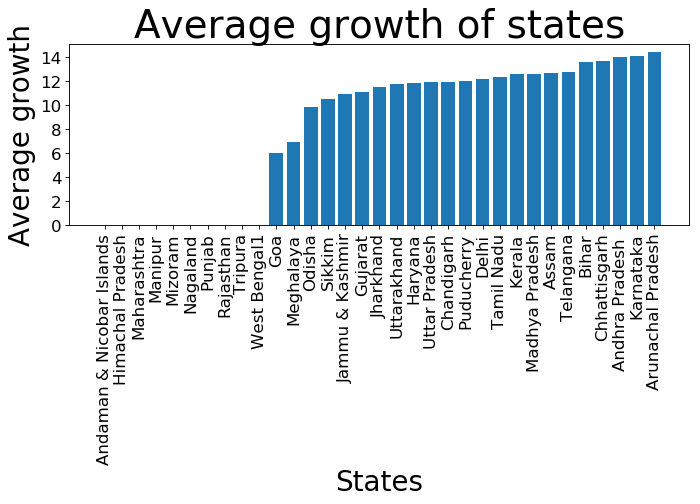

In [10]:
states = tuple(data.columns.values)[2:-1]
avg = []
for state in states:
    s = (float(data.iloc[6][state]) 
         + float(data.iloc[7][state]) 
         + float(data.iloc[8][state])) / 3
    avg.append(s if not math.isnan(s) else 0)

    avg_growth_of_states = list(zip(avg, states))
avg_growth_of_states.sort()

avg_sorted, states_sorted = zip(*avg_growth_of_states)

indices = range(len(states))

plt.figure(figsize=(10, 3), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(indices, avg_sorted)

plt.xlabel('States', fontsize=25)
plt.ylabel('Average growth', fontsize=25)
plt.xticks(indices, states_sorted, fontsize=15, rotation=90)
plt.yticks(fontsize=15)
plt.title('Average growth of states', fontsize=35)
plt.show()

In [11]:
result=data.transpose()
result.head(30)

,0,1,2,3,4,6,7,8,9
Items Description,GSDP - CURRENT PRICES (` in Crore),GSDP - CURRENT PRICES (` in Crore),GSDP - CURRENT PRICES (` in Crore),GSDP - CURRENT PRICES (` in Crore),GSDP - CURRENT PRICES (` in Crore),(% Growth over previous year),(% Growth over previous year),(% Growth over previous year),(% Growth over previous year)
Duration,2011-12,2012-13,2013-14,2014-15,2015-16,2012-13,2013-14,2014-15,2015-16
Andhra Pradesh,379402,411404,464272,526468,609934,8.43,12.85,13.4,15.85
Arunachal Pradesh,11063,12547,14602,16761,18784,13.41,16.38,14.79,12.07
Assam,143175,156864,177745,198098,224234,9.56,13.31,11.45,13.19
Bihar,247144,282368,317101,373920,413503,14.25,12.3,17.92,10.59
Chhattisgarh,158074,177511,206690,234982,260776,12.3,16.44,13.69,10.98
Goa,42367,38120,35921,40633,45002,-10.02,-5.77,13.12,10.75
Gujarat,615606,724495,807623,895027,994316,17.69,11.47,10.82,11.09
Haryana,297539,347032,400662,437462,485184,16.63,15.45,9.18,10.91


## Plot the total GDP of the states for the year 2015-16:Identify the top-5 and the bottom-5 states based on total GDP

# Top 5 States

In [16]:
data = pd.read_csv(r'C:\Users\sban1\Desktop\GDP Assesment\Data Set\1A\ab40c054-5031-4376-b52e-9813e776f65e - Copy.csv')

In [17]:
result.dropna(inplace = True)
large5 = data.nlargest(5, "2015-16")
data.sort_values("2015-16", ascending = False, inplace = True)
data.head()

,Duration,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2012-13.1,2013-14.1,2014-15.1,2015-16.1,2016-17.1
23,Tamil Nadu,751485.0,855481.0,971090.0,1092564.0,1212668.0,1338766.0,13.84,13.51,12.51,10.99,10.40
26,Uttar Pradesh,724049.0,822903.0,944146.0,1043371.0,1153795.0,NaN,13.65,14.73,10.51,10.58,NaN
11,Karnataka,603778.0,691700.0,817886.0,921788.0,1027068.0,NaN,14.56,18.24,12.70,11.42,NaN
6,Gujarat,615606.0,724495.0,807623.0,895027.0,994316.0,NaN,17.69,11.47,10.82,11.09,NaN
0,Andhra Pradesh,379402.0,411404.0,464272.0,526468.0,609934.0,699307.0,8.43,12.85,13.40,15.85,14.65


# Buttom 5 States

In [21]:
result.dropna(inplace = True)
large5 = data.nlargest(5, "2015-16")
data.sort_values("2015-16", ascending = True, inplace = True)
data.head()

,Duration,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2012-13.1,2013-14.1,2014-15.1,2015-16.1,2016-17.1
22,Sikkim,11165.0,12338.0,13862.0,15209.0,16637.0,NaN,10.51,12.35,9.72,9.39,NaN
1,Arunachal Pradesh,11063.0,12547.0,14602.0,16761.0,18784.0,NaN,13.41,16.38,14.79,12.07,NaN
32,Puducherry,16818.0,18875.0,21870.0,24089.0,26533.0,29557.0,12.23,15.87,10.14,10.15,11.40
16,Meghalaya,19918.0,21872.0,22938.0,24408.0,26745.0,29567.0,9.81,4.87,6.41,9.58,10.55
30,Chandigarh,18768.0,21609.0,24787.0,27844.0,30304.0,NaN,15.14,14.71,12.33,8.84,NaN


## Part 1-B

In [35]:
UNION_TERRITORIES = (
    'Delhi',
    'Chandigarh',
    'Andaman and Nicobar Islands',
    'Puducherry',
    'Dadra and Nagar Haveli',
    'Daman and Diu',
    'Lakshadweep'
)

def is_state(filename):
    for territory in UNION_TERRITORIES:
        if territory.lower() in filename.lower():
            return False
    return True

path = r'C:\Users\sban1\Desktop\GDP Assesment\Data Set\1B'
allfiles = [
    join(path, f) for f in listdir(path) 
    if isfile(join(path, f))
]

onlystates = tuple(filter(is_state, allfiles))

states = tuple(
    open(filepath)
    for filepath in onlystates
)

def get_GDP_per_capita(file, year='2014-15'):
    file = csv.reader(file)
    rows = list(file)
    row0 = rows[0]
    row_last = rows[-1]
    
    index = 0
    for i, val in enumerate(row0):
        if val == year:
            index = i
            break
            
    return int(row_last[index])

state_names = tuple(
    ' '.join(filename[filename.index('NAD') + 4:filename.index('-GSVA')].split('_'))
    for filename in onlystates
)

GDP_per_capita = tuple(
    get_GDP_per_capita(state)
    for state in states
)

data = list(zip(state_names, GDP_per_capita))
sorted_data = sorted(data, key=lambda x: x[1])



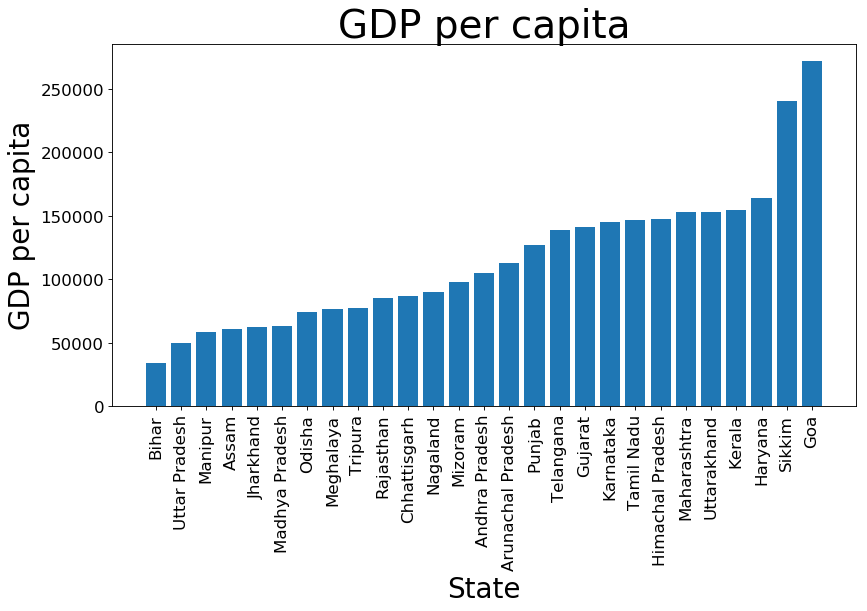

In [90]:
indices = range(len(state_names))

state_names_sorted = tuple(data[0] for data in sorted_data)
GDP_per_capita_sorted = tuple(data[1] for data in sorted_data)

plt.figure(figsize=(12, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(indices, GDP_per_capita_sorted)

plt.xlabel('State', fontsize=25)
plt.ylabel('GDP per capita', fontsize=25)
plt.xticks(indices, state_names_sorted, fontsize=15, rotation=90)
plt.yticks(fontsize=15)
plt.title('GDP per capita', fontsize=35)
plt.show()

In [38]:
highest_per_capita = max(data, key=lambda x: x[1])
lowest_per_capita = min(data, key=lambda x: x[1])

ratio = highest_per_capita[1] / lowest_per_capita[1]
print(ratio)
print(f'{highest_per_capita[1]} : {lowest_per_capita[1]}')

8.004741709371503
271793 : 33954


In [39]:
print(highest_per_capita, lowest_per_capita)


('Goa', 271793) ('Bihar', 33954)


In [41]:
bottom_five = sorted_data[:6]
top_five = sorted_data[-6:][::-1]

In [42]:
top_five
# display(HTML(tabulate.tabulate(top_five, tablefmt='html')))

[('Goa', 271793), ('Sikkim', 240274), ('Haryana', 164077), ('Kerala', 154778), ('Uttarakhand', 153076), ('Maharashtra', 152853)]

In [43]:
bottom_five
# display(HTML(tabulate.tabulate(bottom_five, tablefmt='html')))

[('Bihar', 33954), ('Uttar Pradesh', 49450), ('Manipur', 58442), ('Assam', 60621), ('Jharkhand', 62091), ('Madhya Pradesh', 62989)]

In [44]:
states = tuple(
    open(filepath)
    for filepath in onlystates
)

def get_p_s_t(file, year='2014-15'):
    file = csv.reader(file)
    rows = list(file)
    
    row0 = rows[0]
    row_last = rows[-1]
    
    index = 0
    for i, val in enumerate(row0):
        if val == year:
            index = i
            break
            
    d = {}
            
    for row in rows:
        if row[1] == 'Primary':
            d['primary'] = int(row[index])
        if row[1] == 'Secondary':
            d['secondary'] = int(row[index])
        if row[1] == 'Tertiary':
            d['tertiary'] = int(row[index])
        if row[1] == 'Gross State Domestic Product':
            d['GSDP'] = int(row[index])
            
    return d

In [45]:
p_s_t_GDP_per_state = tuple(
    (
        statename,
        get_p_s_t(state)
    )
    for state, statename in zip(states, state_names)
)

In [46]:
p_s_t_GDP_per_state

(('Andhra Pradesh', {'primary': 16303716, 'secondary': 10488884, 'tertiary': 22032942, 'GSDP': 52646842}), ('Arunachal Pradesh', {'primary': 716959, 'secondary': 287489, 'tertiary': 631844, 'GSDP': 1676119}), ('Assam', {'primary': 5326697, 'secondary': 4033091, 'tertiary': 9307109, 'GSDP': 19809800}), ('Bihar', {'primary': 8019997, 'secondary': 5984896, 'tertiary': 22179969, 'GSDP': 37391988}), ('Chhattisgarh', {'primary': 6400817, 'secondary': 8238886, 'tertiary': 7588778, 'GSDP': 23498180}), ('Goa', {'primary': 312129, 'secondary': 1547536, 'tertiary': 1738217, 'GSDP': 4063307}), ('Gujarat', {'primary': 15887187, 'secondary': 33023538, 'tertiary': 30220377, 'GSDP': 89502727}), ('Haryana', {'primary': 8040424, 'secondary': 12561411, 'tertiary': 19226568, 'GSDP': 43746207}), ('Himachal Pradesh', {'primary': 1548366, 'secondary': 4119162, 'tertiary': 4133326, 'GSDP': 10436879}), ('Jharkhand', {'primary': 5248354, 'secondary': 6241471, 'tertiary': 8133341, 'GSDP': 21710718}), ('Karnataka

In [47]:
p_s_t_GDP_per_state_percentage = tuple(
    (
        statename,
        {
            'primary': data['primary'] / data['GSDP'] * 100,
            'secondary': data['secondary'] / data['GSDP'] * 100,
            'tertiary': data['tertiary'] / data['GSDP'] * 100,
        }
    )
    for statename, data in p_s_t_GDP_per_state
)

In [48]:
p_s_t_GDP_per_state_percentage

(('Andhra Pradesh', {'primary': 30.968079718817705, 'secondary': 19.923101940283523, 'tertiary': 41.85045325225775}), ('Arunachal Pradesh', {'primary': 42.774946170289816, 'secondary': 17.152063785447215, 'tertiary': 37.69684610698882}), ('Assam', {'primary': 26.889201304404892, 'secondary': 20.3590697533544, 'tertiary': 46.98234712112187}), ('Bihar', {'primary': 21.448437028809487, 'secondary': 16.005824563272753, 'tertiary': 59.31743720071797}), ('Chhattisgarh', {'primary': 27.239628771249517, 'secondary': 35.06180478658347, 'tertiary': 32.29517349854329}), ('Goa', {'primary': 7.681649454496055, 'secondary': 38.085628282578696, 'tertiary': 42.778382238900484}), ('Gujarat', {'primary': 17.750506082345403, 'secondary': 36.896683606076046, 'tertiary': 33.76475556996157}), ('Haryana', {'primary': 18.37970546795063, 'secondary': 28.714286017985515, 'tertiary': 43.950251504090396}), ('Himachal Pradesh', {'primary': 14.835526980814858, 'secondary': 39.46737334024856, 'tertiary': 39.60308440

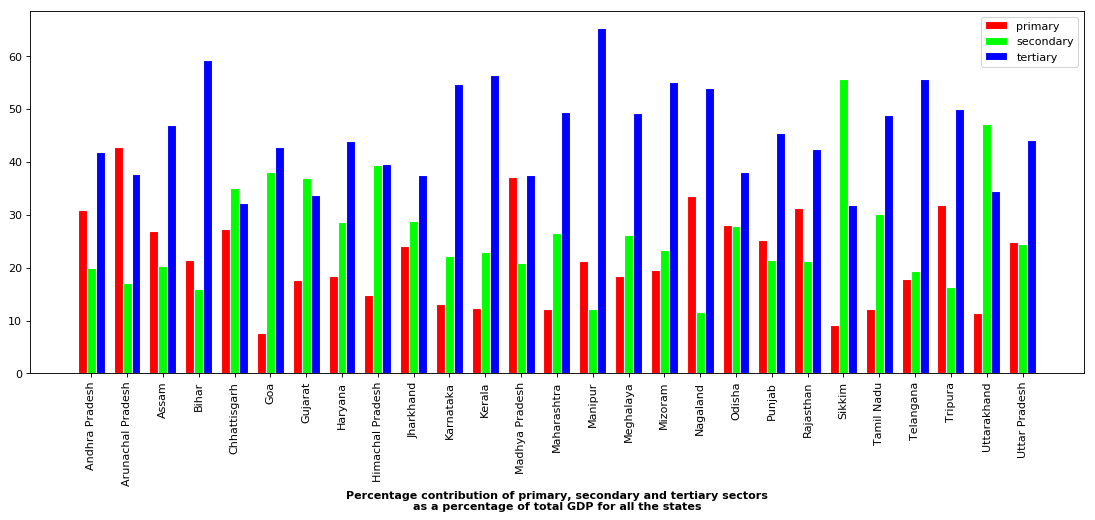

In [91]:
barWidth = 0.25
 
# set height of bar
primary = []
secondary = []
tertiary = []

for state, data in p_s_t_GDP_per_state_percentage:
    primary.append(data['primary'])
    secondary.append(data['secondary'])
    tertiary.append(data['tertiary'])


# Set position of bar on X axis
r1 = np.arange(len(primary))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.figure(figsize=(17, 6), dpi= 80, facecolor='w', edgecolor='k')

# Make the plot
plt.bar(r1, primary, color='#ff0000', width=barWidth, edgecolor='white', label='primary')
plt.bar(r2, secondary, color='#00ff00', width=barWidth, edgecolor='white', label='secondary')
plt.bar(r3, tertiary, color='#0000ff', width=barWidth, edgecolor='white', label='tertiary')

# Add xticks on the middle of the group bars
plt.xlabel('''Percentage contribution of primary, secondary and tertiary sectors
as a percentage of total GDP for all the states''', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(primary))], state_names, rotation=90)

# Create legend & Show graphic
plt.legend()
plt.show()

In [50]:
old_min = sorted_data[0][1]
old_max = sorted_data[-1][1]
old_range = old_max - old_min

new_min = 0
new_max = 100
new_range = new_max - new_min

old_range

237839

In [51]:
percent_GDP = tuple(
    (
        d[0],
        (((d[1] - old_min) * new_range) / old_range) + new_min
    )
    for d in sorted_data
)

percent_GDP

(('Bihar', 0.0), ('Uttar Pradesh', 6.515331800083249), ('Manipur', 10.296040598892528), ('Assam', 11.212206576717863), ('Jharkhand', 11.830271738444914), ('Madhya Pradesh', 12.207838075336678), ('Odisha', 16.82861095110558), ('Meghalaya', 17.77420860329887), ('Tripura', 18.249319918095853), ('Rajasthan', 21.39388409806634), ('Chhattisgarh', 22.244459487300233), ('Nagaland', 23.399442479996974), ('Mizoram', 26.7966986070409), ('Andhra Pradesh', 29.861797266217902), ('Arunachal Pradesh', 33.11651999882273), ('Punjab', 38.95576419342496), ('Telangana', 44.18156820370082), ('Gujarat', 45.11833635358373), ('Karnataka', 46.74885111356842), ('Tamil Nadu', 47.32150740627063), ('Himachal Pradesh', 47.66922161630347), ('Maharashtra', 49.9913807239351), ('Uttarakhand', 50.085141629421585), ('Kerala', 50.80075176905385), ('Haryana', 54.710539482591166), ('Sikkim', 86.7477579370919), ('Goa', 100.0))

In [69]:
categories = {
    'C1': set(),
    'C2': set(),
    'C3': set(),
    'C4': set(),
}

In [70]:
for state, val in percent_GDP:
    if 85 <= val <= 100:
        categories['C1'].add(state)
    elif val >= 50:
        categories['C2'].add(state)
    elif val >= 20:
        categories['C3'].add(state)
    else:
        categories['C4'].add(state)

In [72]:
pprint(categories)

{'C1': {'Goa', 'Sikkim'},
 'C2': {'Haryana', 'Kerala', 'Uttarakhand'},
 'C3': {'Andhra Pradesh',
        'Arunachal Pradesh',
        'Chhattisgarh',
        'Gujarat',
        'Himachal Pradesh',
        'Karnataka',
        'Maharashtra',
        'Mizoram',
        'Nagaland',
        'Punjab',
        'Rajasthan',
        'Tamil Nadu',
        'Telangana'},
 'C4': {'Assam',
        'Bihar',
        'Jharkhand',
        'Madhya Pradesh',
        'Manipur',
        'Meghalaya',
        'Odisha',
        'Tripura',
        'Uttar Pradesh'}}


In [74]:
categories_files = {
    'C1': [],
    'C2': [],
    'C3': [],
    'C4': [],
}

for state in onlystates:
    statename = ' '.join(state[state.index('NAD') + 4:state.index('-GSVA')].split('_'))
    if statename in categories['C1']:
        categories_files['C1'].append(open(state))
    elif statename in categories['C2']:
        categories_files['C2'].append(open(state))
    elif statename in categories['C3']:
        categories_files['C3'].append(open(state))
    else:
        categories_files['C4'].append(open(state))

In [75]:
def get_all_values(file, year='2014-15'):
    data = {}
    file = csv.reader(file)
    
    rows = list(file)
    row0 = rows[0]
    
    index = 0
    for i, val in enumerate(row0):
        if val == year:
            index = i
            break
    
    done = False
    for row in rows:
        if row[1] == 'Tertiary':
            done = True
            
        if row[0] == 'Total' or row[0] == 'S.No.':
            continue
        
        if not done:
            if float(row[0]).is_integer():
                data[row[1]] = 0 if row[index] == 'NA' else float(row[index])
        else:
            if row[1] == 'Gross State Domestic Product':
                data[row[1]] = float(row[index])
            if row[1] == 'Per Capita GSDP (Rs.)':
                data[row[1]] = float(row[index])
                break
            
    return data

In [76]:
all_values = {
    'C1': {},
    'C2': {},
    'C3': {},
    'C4': {},
}

for category in categories_files.keys():
    for file in categories_files[category]:
        values = get_all_values(file)
        for key in values:
            if key not in all_values[category]:
                all_values[category][key] = values[key]
            else:
                all_values[category][key] += values[key]

In [78]:
all_values_sorted = {}

for category in all_values:              
    all_values_sorted[category] = sorted(
        list(all_values[category].items()), 
        key=lambda x: x[1],
        reverse=True
    )

pprint(all_values_sorted)

{'C1': [('Gross State Domestic Product', 5584240.0),
        ('Manufacturing', 1728305.0),
        ('Per Capita GSDP (Rs.)', 512067.0),
        ('Real estate, ownership of dwelling & professional services',
         482429.0),
        ('Public administration', 466000.0),
        ('Trade, repair, hotels and restaurants', 451495.0),
        ('Agriculture, forestry and fishing', 445954.0),
        ('Electricity, gas, water supply & other utility services', 416609.0),
        ('Other services', 329696.0),
        ('Financial services', 254697.0),
        ('Construction', 247877.0),
        ('Transport, storage, communication & services related to broadcasting',
         237003.0),
        ('Mining and quarrying', 4951.0)],
 'C2': [('Gross State Domestic Product', 112544966.0),
        ('Manufacturing', 17896740.0),
        ('Agriculture, forestry and fishing', 15547278.0),
        ('Trade, repair, hotels and restaurants', 15286770.0),
        ('Real estate, ownership of dwelling & professi

In [79]:
def get_top_n(category, top):
    s, i = 0, 0
    while i <= top:
        if all_values_sorted[category][i][0] == 'Gross State Domestic Product'\
        or all_values_sorted[category][i][0] == 'Per Capita GSDP (Rs.)':
            i += 1
            continue
        s += all_values_sorted[category][i][1]
        i += 1

    return s

In [81]:
for category in all_values_sorted:
    p = 0
    for i in range(6, 10):
        p = get_top_n(category, i) / all_values[category]['Gross State Domestic Product'] * 100
        if p >= 80:
            break
    print(f'{category}: Top {i} contributes {p:.04} %\n')

C1: Top 9 contributes 81.93 %

C2: Top 7 contributes 82.23 %

C3: Top 8 contributes 82.38 %

C4: Top 7 contributes 80.03 %



In [82]:
percentage_of_gsdp = {
    'C1': [],
    'C2': [],
    'C3': [],
    'C4': [],
}

for category in all_values_sorted:
    gsdp = all_values_sorted[category][0][1]
    for sector, value in all_values_sorted[category]:
        if sector == 'Gross State Domestic Product' or sector == 'Per Capita GSDP (Rs.)':
            continue
        percentage_of_gsdp[category].append((sector, value / gsdp * 100))
        
pprint(percentage_of_gsdp)

{'C1': [('Manufacturing', 30.949690557712415),
        ('Real estate, ownership of dwelling & professional services',
         8.639116513616893),
        ('Public administration', 8.344913542397892),
        ('Trade, repair, hotels and restaurants', 8.085164677735914),
        ('Agriculture, forestry and fishing', 7.985938999756457),
        ('Electricity, gas, water supply & other utility services',
         7.4604422446026675),
        ('Other services', 5.904044238786298),
        ('Financial services', 4.560996662034583),
        ('Construction', 4.438867240663009),
        ('Transport, storage, communication & services related to broadcasting',
         4.244140652980531),
        ('Mining and quarrying', 0.08866022950302996)],
 'C2': [('Manufacturing', 15.901857396269506),
        ('Agriculture, forestry and fishing', 13.814281129197727),
        ('Trade, repair, hotels and restaurants', 13.582810980635065),
        ('Real estate, ownership of dwelling & professional services',


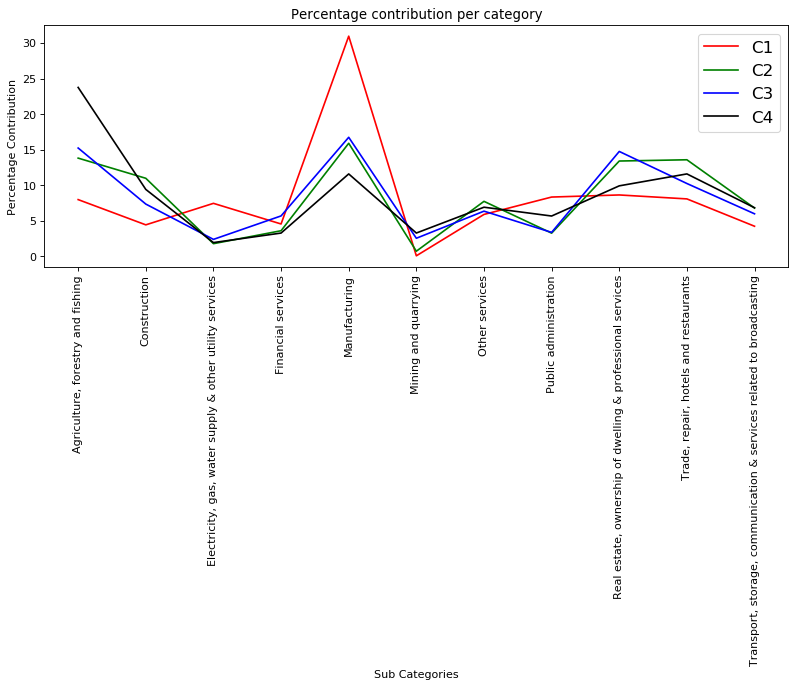

In [92]:
c1 = sorted(percentage_of_gsdp['C1'])
c2 = sorted(percentage_of_gsdp['C2'])
c3 = sorted(percentage_of_gsdp['C3'])
c4 = sorted(percentage_of_gsdp['C4'])

x_ticks = tuple(x[0] for x in c1)

c1_values = tuple(x[1] for x in c1)
c2_values = tuple(x[1] for x in c2)
c3_values = tuple(x[1] for x in c3)
c4_values = tuple(x[1] for x in c4)

xaxis = tuple(range(len(c1)))

plt.figure(figsize=(12, 4), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(xaxis, c1_values, color='red', label='C1')
plt.plot(xaxis, c2_values, color='green', label='C2')
plt.plot(xaxis, c3_values, color='blue', label='C3')
plt.plot(xaxis, c4_values, color='black', label='C4')

plt.xlabel('Sub Categories')
plt.ylabel('Percentage Contribution')

plt.title('Percentage contribution per category')
plt.xticks(xaxis, x_ticks, rotation=90)

plt.legend(loc=1, prop={'size': 15})

plt.show()

In [84]:
sorted_data_dict = dict(sorted_data)

## Part 2

## Analyse if there is any correlation of GDP per capita with dropout rates in education (primary, upper primary and secondary) for the year 2014-2015 for the states. Choose an appropriate plot to conduct this analysis.

In [86]:
f = open(r'C:\Users\sban1\Desktop\GDP Assesment\Data Set\1A\rs_session243_au570_1.csv')

gdp_and_education = {
    state: [('GDP', gdp)]
    for state, gdp in sorted_data_dict.items()
}


def get_p_up_s(file, year='2014-2015'):
    global gdp_and_education
    file = csv.reader(file)
    
    rows = list(file)
    
    primary_index = 0
    upper_primary_index = 0
    secondary_index = 0
    
    primary = f'Primary - {year}'
    upper_primary = f'Upper Primary - {year}'
    secondary = f'Secondary - {year}'

    for i, val in enumerate(rows[0]):
        if val == primary:
            primary_index = i
        if val == upper_primary:
            upper_primary_index = i
        if val == secondary:
            secondary_index = i
            
#     print(primary_index, upper_primary_index, secondary_index)
    
    for row in rows:
        if row[1] in sorted_data_dict:
            gdp_and_education[row[1]].append(
                (primary, float(row[primary_index]) if row[primary_index] != 'NA' else 0)
            )
            gdp_and_education[row[1]].append(
                (upper_primary, float(row[upper_primary_index]) if row[upper_primary_index] != 'NA' else 0)
            )
            gdp_and_education[row[1]].append(
                (secondary, float(row[secondary_index]) if row[secondary_index] != 'NA' else 0)
            )
    

get_p_up_s(f)

In [87]:
pprint(gdp_and_education)

{'Andhra Pradesh': [('GDP', 104977),
                    ('Primary - 2014-2015', 6.72),
                    ('Upper Primary - 2014-2015', 5.2),
                    ('Secondary - 2014-2015', 15.71)],
 'Arunachal Pradesh': [('GDP', 112718),
                       ('Primary - 2014-2015', 10.82),
                       ('Upper Primary - 2014-2015', 6.71),
                       ('Secondary - 2014-2015', 17.11)],
 'Assam': [('GDP', 60621),
           ('Primary - 2014-2015', 15.36),
           ('Upper Primary - 2014-2015', 10.51),
           ('Secondary - 2014-2015', 27.06)],
 'Bihar': [('GDP', 33954),
           ('Primary - 2014-2015', 0),
           ('Upper Primary - 2014-2015', 4.08),
           ('Secondary - 2014-2015', 25.9)],
 'Chhattisgarh': [('GDP', 86860)],
 'Goa': [('GDP', 271793),
         ('Primary - 2014-2015', 0.73),
         ('Upper Primary - 2014-2015', 0.07),
         ('Secondary - 2014-2015', 11.15)],
 'Gujarat': [('GDP', 141263),
             ('Primary - 2014-2015', 0.89),

In [93]:
sns.pairplot(gdp_and_education)

TypeError: 'data' must be pandas DataFrame object, not: <class 'dict'>